In [27]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import math
test_size = 6000

In [28]:
transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()])
train_set = torchvision.datasets.MNIST(root = './data',
                                       train=True,
                                       transform=transform,
                                       download= True)
train_set = torch.utils.data.Subset(train_set,range(0,test_size ))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = torchvision.datasets.MNIST(root = './data',
                                       train=False,
                                       transform=transform,
                                       download= True)
test_set = torch.utils.data.Subset(test_set,range(0,test_size ))
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

In [29]:
class VGG11(nn.Module):

    def __init__(self):
        super(VGG11, self).__init__()
        self.conv1 = nn.Conv2d(  1,  64, 3, 1, 1)
        self.batch1 = nn.BatchNorm2d(64)
        
        self.conv2 = nn.Conv2d( 64, 128, 3, 1, 1)
        self.batch2 = nn.BatchNorm2d(128)
        
        self.conv3 = nn.Conv2d(128, 256, 3, 1, 1)
        self.batch3 = nn.BatchNorm2d(256)
        
        self.conv4 = nn.Conv2d(256, 256, 3, 1, 1)
        self.batch4 = nn.BatchNorm2d(256)
        
        self.conv5 = nn.Conv2d(256, 512, 3, 1, 1)
        self.batch5 = nn.BatchNorm2d(512)
        
        self.conv6 = nn.Conv2d(512, 512, 3, 1, 1)
        self.batch6 = nn.BatchNorm2d(512)
        
        self.conv7 = nn.Conv2d(512, 512, 3, 1, 1)
        self.batch7 = nn.BatchNorm2d(512)
        
        self.conv8 = nn.Conv2d(512, 512, 3, 1, 1)
        self.batch8 = nn.BatchNorm2d(512)
        
        self.fc1 = nn.Linear( 512,4096) 
        self.fc2 = nn.Linear(4096,4096)
        self.fc3 = nn.Linear(4096,  10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.batch1(self.conv1(x))), (2, 2))
        x = F.max_pool2d(F.relu(self.batch2(self.conv2(x))), (2, 2))
        x = F.relu(self.batch3(self.conv3(x)))
        x = F.max_pool2d(F.relu(self.batch4(self.conv4(x))), (2, 2))
        x = F.relu(self.batch5(self.conv5(x)))
        x = F.max_pool2d(F.relu(self.batch6(self.conv6(x))), (2, 2))
        x = F.relu(self.batch7(self.conv7(x)))
        x = F.max_pool2d(F.relu(self.batch8(self.conv8(x))), (2, 2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.dropout(F.relu(self.fc1(x)),0.5)
        x = F.dropout(F.relu(self.fc2(x)),0.5)
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:] 
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [30]:
def test_acc_loss(data_set,net): 
        correct = 0
        total = 0.0
        loss = 0
        count = 0.0
        for i, data in enumerate(data_set, 1):
            #loss
            inputs,labels = data
            outputs = net(inputs)
            loss = criterion(outputs,labels)
            loss = loss + loss.item()
            count = count + 1
            
            #acc 
            total = total + labels.size(0)
            _,predicted = torch.max(outputs.data,1)
            correct = correct + (predicted == labels).sum().item()
        return loss/count,correct / total
        

In [31]:
def train_model(net):
    train_acc =[]
    train_loss = []
    test_loss = []
    test_acc = []
    for epoch in range(5):
        for i, data in enumerate(train_loader, 1):
            inputs,labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            
        #train
        t_loss,t_acc = test_acc_loss(train_loader,net)
        train_loss.append(t_loss)
        train_acc.append(t_acc)
        
        #test 
        
        te_loss,te_acc = test_acc_loss(test_loader,net)
        test_loss.append(te_loss)
        test_acc.append(te_acc)
    
    return train_acc,train_loss,test_acc,test_loss    

In [32]:
vgg = VGG11()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg.parameters(), 0.01, 0.9)
def main():
    train_acc,train_loss,test_acc,test_loss =  train_model(vgg)
    epoch = range(1,len(train_acc) + 1)
    plt.plot(epoch,test_acc)
    plt.xlabel('the number of epochs')
    plt.ylabel('test accuracy')
    plt.title('test accuracy vs the number of epochs')
    plt.show()
    
    plt.plot(epoch,train_acc)
    plt.xlabel('the number of epochs')
    plt.ylabel('trainning accuracy')
    plt.title('trainning accuracy vs the number of epochs')
    plt.show()
    
    plt.plot(epoch,test_loss)
    plt.xlabel('the number of epochs')
    plt.ylabel('test loss')
    plt.title('test loss vs the number of epochs')
    plt.show()
    
    plt.plot(epoch,train_loss)
    plt.xlabel('the number of epochs')
    plt.ylabel('test loss')
    plt.title('training loss vs the number of epochs')
    plt.show()
    
    

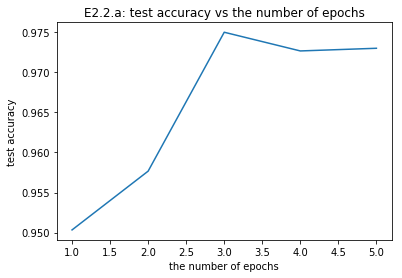

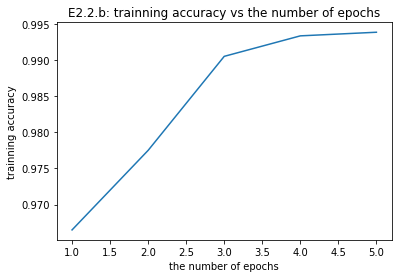

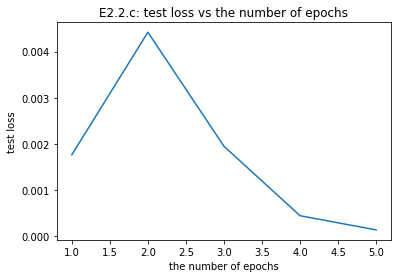

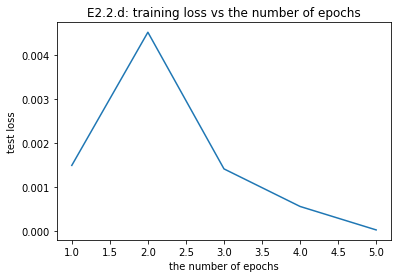

In [33]:
main()

In [34]:
def test_acc_flip(net):
    transform_right_to_left = transforms.Compose([transforms.Resize((32,32)),
                                              transforms.RandomHorizontalFlip(p=1),transforms.ToTensor()])
    test_hor = torchvision.datasets.MNIST(root = './data_hor',
                                       train=False,
                                       transform=transform_right_to_left,
                                       download= True)
    test_hor = torch.utils.data.Subset(test_hor,range(0,test_size ))
    test_hor_loader = torch.utils.data.DataLoader(test_hor, batch_size=64, shuffle=False)

    transform_top_to_bot = transforms.Compose([transforms.Resize((32,32)),
                                           transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])

    test_ver = torchvision.datasets.MNIST(root = './data_ver',
                                       train=False,
                                       transform=transform_top_to_bot,
                                       download= True)
    
    test_ver = torch.utils.data.Subset(test_ver,range(0,test_size ))
    test_ver_loader = torch.utils.data.DataLoader(test_ver, batch_size=64, shuffle=False)
    hor_loss, hor_acc = test_acc_loss(test_hor_loader,net)
    print "           when flip type is left to right, we got test accuracy is: " , hor_acc
    ver_loss, ver_acc = test_acc_loss(test_ver_loader,net)
    print "           when flip type is top to bottom, we got test accuracy is: " , ver_acc

In [35]:
test_acc_flip(vgg)

E2.3.e :
           when flip type is left to right, we got test accuracy is:  0.497833333333
           when flip type is top to bottom, we got test accuracy is:  0.394666666667


In [36]:
def test_acc_gaussian(net):
    var = [0.01,0.1,1]
    for i in var:
        transform_noise = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor(),
                                              transforms.Lambda(lambda x : x + math.sqrt(i) * torch.randn_like(x))])
        test_gau = torchvision.datasets.MNIST(root = './data_gau',
                                              train=False,transform=transform_noise,download= True)
        test_gau = torch.utils.data.Subset(test_gau,range(0,test_size ))
        test_gau_loader = torch.utils.data.DataLoader(test_gau, batch_size=64, shuffle=False)
        gau_loss, gau_acc = test_acc_loss(test_gau_loader,net)
        print "           when add Gaussian noise to test image with variance", i, ", we got test accuracy is: " , gau_acc
    
    

In [37]:
test_acc_gaussian(vgg)

E2.3.f :
           when add Gaussian noise to test image with variance 0.01 , we got test accuracy is:  0.971833333333
           when add Gaussian noise to test image with variance 0.1 , we got test accuracy is:  0.931
           when add Gaussian noise to test image with variance 1 , we got test accuracy is:  0.518


In [38]:
transform_final = transforms.Compose([transforms.Resize((32,32)),
                                      transforms.RandomHorizontalFlip(p=0.1),
                                      transforms.RandomVerticalFlip(p=0.1),
                                      transforms.ToTensor(),
                                      transforms.Lambda(lambda x : x + math.sqrt(1) * torch.randn_like(x))])

train_final = torchvision.datasets.MNIST(root = './data_final',
                                       train=True,
                                       transform=transform_final,
                                       download= True)
train_final = torch.utils.data.Subset(train_final,range(0,test_size ))
train_final_loader = torch.utils.data.DataLoader(train_final, batch_size=64, shuffle=True)

In [39]:
#retrain my model
vgg_final = VGG11()
criterion_final = nn.CrossEntropyLoss()
optimizer_final = optim.SGD(vgg_final.parameters(), 0.01, 0.9)
for epoch in range(5):
    for i, data in enumerate(train_final_loader, 1):
            inputs,labels = data
            optimizer_final.zero_grad()
            outputs = vgg_final(inputs)
            loss = criterion_final(outputs,labels)
            loss.backward()
            optimizer_final.step()
test_acc_flip(vgg_final)

test_acc_gaussian(vgg_final)

           when flip type is left to right, we got test accuracy is:  0.671
           when flip type is top to bottom, we got test accuracy is:  0.637333333333
           when add Gaussian noise to test image with variance 0.01 , we got test accuracy is:  0.9305
           when add Gaussian noise to test image with variance 0.1 , we got test accuracy is:  0.918
           when add Gaussian noise to test image with variance 1 , we got test accuracy is:  0.765666666667
